In [11]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [5]:
X, y = make_blobs(n_samples= 1000, centers = 3, n_features= 2, cluster_std= 2, random_state= 2)

# use "to_categorical" to one-hot encode label
y = to_categorical(y)

n_train = 200
train_x, test_x = X[:n_train,:], X[n_train:, :]
train_y, test_y = y[:n_train,:], y[n_train:, :]

print(train_x.shape, test_x.shape)

model = Sequential()
model.add(Dense(25, input_dim = 2, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

(200, 2) (800, 2)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_x, train_y, validation_data= (test_x, test_y), epochs= 1000, verbose = 1)

# Evaluate the model 
_, train_acc = model.evaluate(train_x, train_y)
_, test_acc = model.evaluate(test_x, test_y)
print('Train: %.3f, Test: %.3f' %(train_acc, test_acc))


Epoch 1/1000
7/7 [==============================] - 0s 26ms/step - loss: 1.9312 - accuracy: 0.4100 - val_loss: 1.8412 - val_accuracy: 0.4375
Epoch 2/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.7344 - accuracy: 0.4300 - val_loss: 1.6616 - val_accuracy: 0.4512
Epoch 3/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.5719 - accuracy: 0.4450 - val_loss: 1.4823 - val_accuracy: 0.4650
Epoch 4/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.4130 - accuracy: 0.4650 - val_loss: 1.3202 - val_accuracy: 0.4725
Epoch 5/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.2670 - accuracy: 0.4750 - val_loss: 1.1774 - val_accuracy: 0.4837
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 1.1450 - accuracy: 0.4700 - val_loss: 1.0582 - val_accuracy: 0.4787
Epoch 7/1000
7/7 [==============================] - 0s 5ms/step - loss: 1.0432 - accuracy: 0.4600 - val_loss: 0.9646 - val_accuracy: 0.4650
Epoch 8/1000
7/7 [=

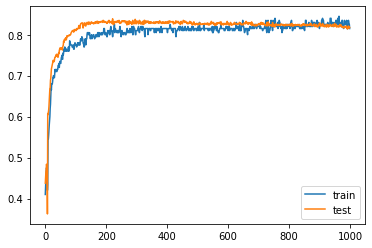

In [9]:
# Plot the model 
# Note: the original version is ['acc'] and ['val_acc']

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

In [14]:
# Tune the model 
import keras
keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, decay = 0.0)